In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("data/Sponsored_Products_Campaign_L30.csv")

In [3]:
df['Portfolio name'].describe()

count              2232
unique               11
top       Garments Team
freq                438
Name: Portfolio name, dtype: object

In [4]:
df.columns


Index(['Start Date', 'End Date', 'Portfolio name', 'Program Type',
       'Campaign Name', 'Retailer', 'Country', 'Status', 'Currency',
       'Budget Amount', 'Targeting Type', 'Bidding strategy', 'Impressions',
       'Last Year Impressions', 'Clicks', 'Last Year Clicks',
       'Click-Thru Rate (CTR)', 'Spend', 'Last Year Spend',
       'Cost Per Click (CPC)', 'Last Year Cost Per Click (CPC)',
       '7 Day Total Orders (#)', 'Total Advertising Cost of Sales (ACOS) ',
       'Total Return on Advertising Spend (ROAS)', '7 Day Total Sales '],
      dtype='object')

In [5]:
# Clean and convert '7 Day Total Sales' in the original df
df["7 Day Total Sales "] = (
    df["7 Day Total Sales "]
    .astype(str)                     # ensure it's a string
    .str.replace(r"[^0-9.]", "", regex=True)  # remove commas, $ symbols, etc
    .replace("", "0")                # empty strings → 0
    .astype(float)                   # convert to float
)

# Do the same for other numeric columns if needed
numeric_cols = [
    "Impressions",
    "Clicks",
    "Spend",
    "7 Day Total Orders (#)",
    "Total Advertising Cost of Sales (ACOS) ",
    "Total Return on Advertising Spend (ROAS)"
]

for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r"[^0-9.]", "", regex=True)
        .replace("", "0")
        .astype(float)
    )


In [6]:
# Remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Replace multiple spaces inside names with a single space
df.columns = df.columns.str.replace(r"\s+", " ", regex=True)


In [7]:
metrics = [
    "Impressions",
    "Clicks",
    "Spend",
    "7 Day Total Sales",
    "7 Day Total Orders (#)",
    "Total Advertising Cost of Sales (ACOS)",
    "Total Return on Advertising Spend (ROAS)"
]
for col in metrics:
    df[col] = pd.to_numeric(df[col], errors="coerce")



In [8]:
portfolio_avg = (
    df.groupby("Portfolio name")[metrics]
      .mean()
      .round(2)
      .reset_index()
)

In [9]:
df['7 Day Total Sales']

0       3874.34
1       1054.98
2         44.97
3       2964.02
4       7742.95
         ...   
2227      78.91
2228      44.45
2229      74.97
2230       0.00
2231       0.00
Name: 7 Day Total Sales, Length: 2232, dtype: float64

In [10]:
portfolio_sum = (
    df.groupby("Portfolio name")[[
        "Impressions",
        "Clicks",
        "Spend",
        "7 Day Total Sales",
        "7 Day Total Orders (#)"
    ]]
    .sum()
    .reset_index()
)

In [11]:
df.columns = (
    df.columns
      .str.strip()
      .str.replace(r"\s+", " ", regex=True)
)


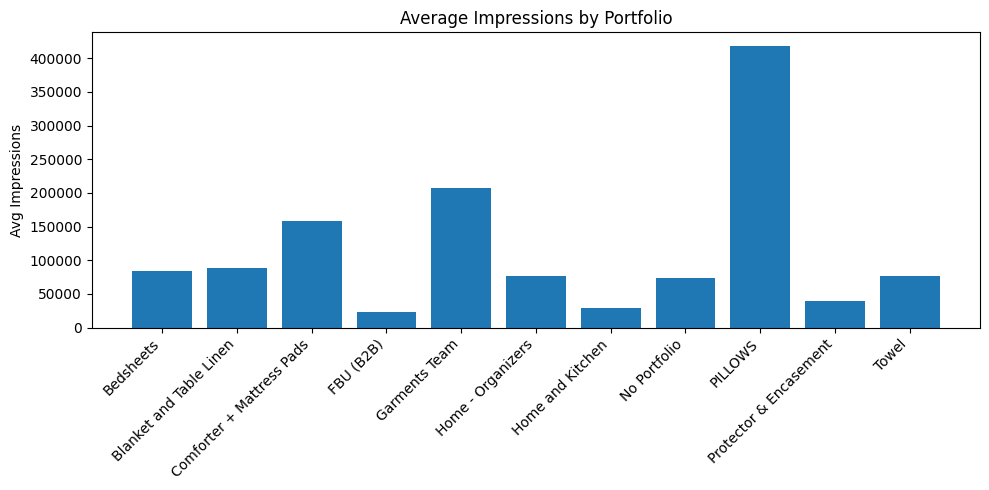

In [12]:
# Average Impressions
plt.figure(figsize=(10,5))
plt.bar(portfolio_avg["Portfolio name"], portfolio_avg["Impressions"])
plt.xticks(rotation=45, ha="right")
plt.title("Average Impressions by Portfolio")
plt.ylabel("Avg Impressions")
plt.tight_layout()
plt.show()


In [13]:
portfolio_avg.columns

Index(['Portfolio name', 'Impressions', 'Clicks', 'Spend', '7 Day Total Sales',
       '7 Day Total Orders (#)', 'Total Advertising Cost of Sales (ACOS)',
       'Total Return on Advertising Spend (ROAS)'],
      dtype='object')

In [14]:
# Check first few values and types
print(portfolio_avg[["Portfolio name", "7 Day Total Sales"]].head())
print(portfolio_avg["7 Day Total Sales"].dtype)
# Convert again safely
portfolio_avg["7 Day Total Sales"] = pd.to_numeric(portfolio_avg["7 Day Total Sales"], errors="coerce")


              Portfolio name  7 Day Total Sales
0                  Bedsheets            4469.11
1    Blanket and Table Linen            5801.42
2  Comforter + Mattress Pads           11220.83
3                  FBU (B2B)            1485.35
4              Garments Team            3929.29
float64


In [15]:
# Clean and convert '7 Day Total Sales' in the original df
df["7 Day Total Sales"] = (
    df["7 Day Total Sales"]
    .astype(str)                     # ensure it's a string
    .str.replace(r"[^0-9.]", "", regex=True)  # remove commas, $ symbols, etc
    .replace("", "0")                # empty strings → 0
    .astype(float)                   # convert to float
)

# Do the same for other numeric columns if needed
numeric_cols = [
    "Impressions",
    "Clicks",
    "Spend",
    "7 Day Total Orders (#)",
    "Total Advertising Cost of Sales (ACOS)",
    "Total Return on Advertising Spend (ROAS)"
]

for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace(r"[^0-9.]", "", regex=True)
        .replace("", "0")
        .astype(float)
    )


In [16]:
portfolio_avg = df.groupby("Portfolio name")[["Impressions", "Clicks", "Spend",
                                               "7 Day Total Sales", "7 Day Total Orders (#)",
                                               "Total Advertising Cost of Sales (ACOS)",
                                               "Total Return on Advertising Spend (ROAS)"]].mean().reset_index()


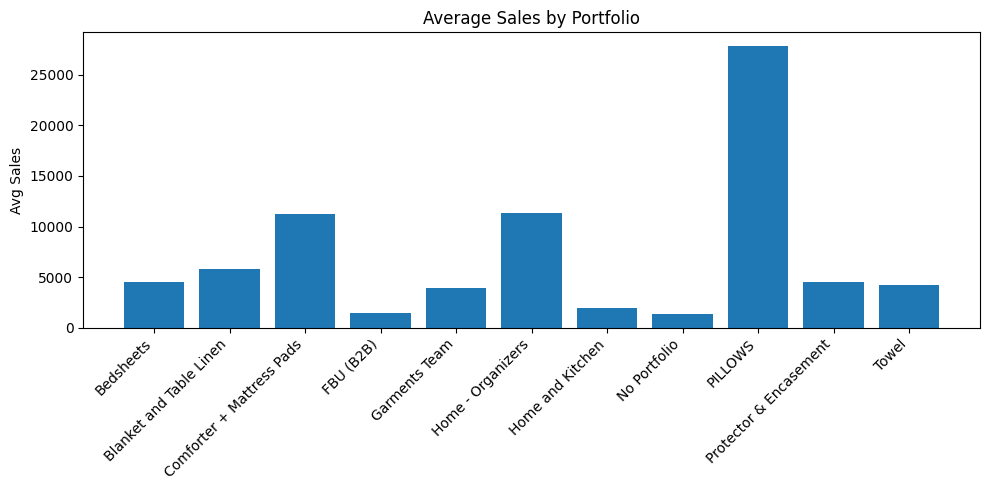

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(portfolio_avg["Portfolio name"], portfolio_avg["7 Day Total Sales"])
plt.xticks(rotation=45, ha="right")
plt.title("Average Sales by Portfolio")
plt.ylabel("Avg Sales")
plt.tight_layout()
plt.show()


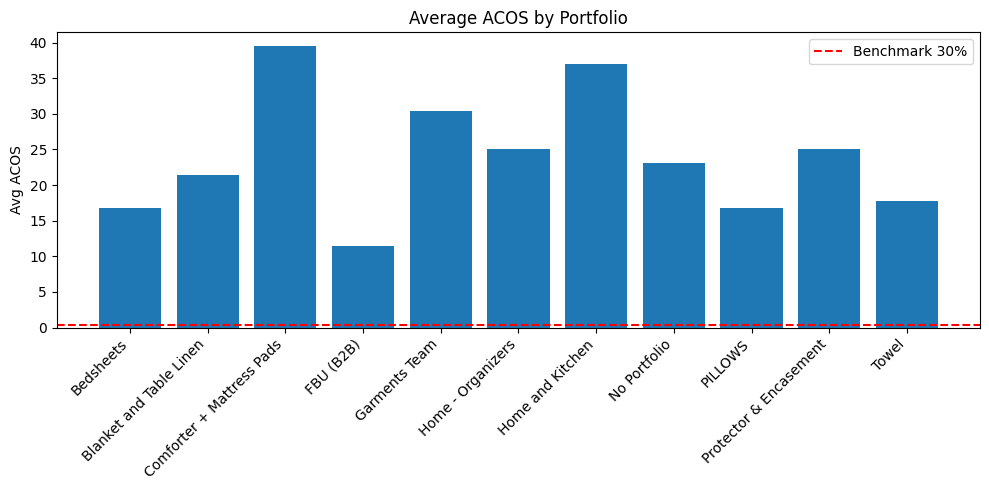

In [18]:
# Average ACOS
plt.figure(figsize=(10,5))
plt.bar(
    portfolio_avg["Portfolio name"],
    portfolio_avg["Total Advertising Cost of Sales (ACOS)"]
)
plt.xticks(rotation=45, ha="right")
plt.title("Average ACOS by Portfolio")
plt.ylabel("Avg ACOS")
plt.axhline(0.3, color='red', linestyle='--', label='Benchmark 30%') # optional
plt.legend()
plt.tight_layout()
plt.show()

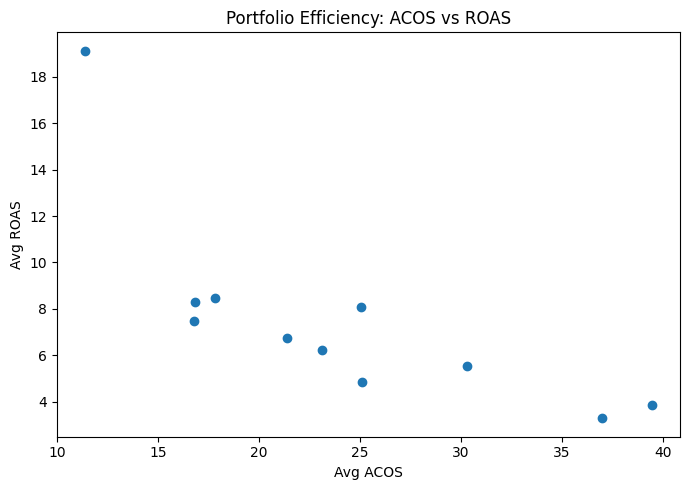

In [19]:
# ROAS vs ACOS scatter
plt.figure(figsize=(7,5))
plt.scatter(
    portfolio_avg["Total Advertising Cost of Sales (ACOS)"],
    portfolio_avg["Total Return on Advertising Spend (ROAS)"]
)
plt.xlabel("Avg ACOS")
plt.ylabel("Avg ROAS")
plt.title("Portfolio Efficiency: ACOS vs ROAS")
plt.tight_layout()
plt.show()

In [20]:
for portfolio, ACOS in zip(portfolio_avg["Portfolio name"],portfolio_avg["Total Advertising Cost of Sales (ACOS)"]):
    print(portfolio, round(ACOS,00))

Bedsheets 17.0
Blanket and Table Linen 21.0
Comforter + Mattress Pads 39.0
FBU (B2B) 11.0
Garments Team 30.0
Home - Organizers 25.0
Home and Kitchen 37.0
No Portfolio 23.0
PILLOWS 17.0
Protector & Encasement 25.0
Towel 18.0


In [26]:
# -----------------------------
df.columns = df.columns.str.strip().str.replace(r"\s+", " ", regex=True)

# -----------------------------
# 2️⃣ Clean & convert numeric columns
# -----------------------------
numeric_cols = [
    "Impressions",
    "Clicks",
    "Total Advertising Cost of Sales (ACOS)"
]

for col in numeric_cols:
    df[col] = (
        df[col].astype(str)
        .str.replace(r"[^0-9.]", "", regex=True)  # remove commas, $ etc
        .replace("", "0")
        .astype(float)
    )

# -----------------------------
# 3️⃣ Calculate portfolio-level averages
# -----------------------------
portfolio_benchmark = (
    df.groupby("Portfolio name")[numeric_cols]
      .mean()
      .round(2)
      .reset_index()
)

portfolio_benchmark[['Portfolio name','Total Advertising Cost of Sales (ACOS)']]

,Portfolio name,Total Advertising Cost of Sales (ACOS)
0,Bedsheets,16.84
1,Blanket and Table Linen,21.40
2,Comforter + Mattress Pads,39.45
3,FBU (B2B),11.38
4,Garments Team,30.32
5,Home - Organizers,25.03
6,Home and Kitchen,36.98
7,No Portfolio,23.12
8,PILLOWS,16.75
9,Protector & Encasement,25.10
